# Importing Data Processing Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## Importing Plotting Libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

## Understanding the data and doing Feature Engineering using Pandas

In [3]:
df = pd.read_csv('train_s3TEQDk.csv')
dftest = pd.read_csv('test_mSzZ8RL.csv')

In [4]:
df.head() # to take a quick look dataframe

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [5]:
df.dtypes # checking dtypes of the dataframe

ID                     object
Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
Is_Lead                 int64
dtype: object

In [6]:
df.shape # checking shape of the dataframe

(245725, 11)

In [7]:
df.isnull().sum() # checking null values in the dataframe

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [8]:
df.nunique() # checking unique values in the dataframe

ID                     245725
Gender                      2
Age                        63
Region_Code                35
Occupation                  4
Channel_Code                4
Vintage                    66
Credit_Product              2
Avg_Account_Balance    135292
Is_Active                   2
Is_Lead                     2
dtype: int64

### Function to impute most occurred category and add importance variable for Credit Product feature

In [9]:
#1. Function to replace NAN values with mode value
def impute_nan_add_variable(DataFrame,ColName):
    # add new column and replace if category is null then 1 else 0
    DataFrame[ColName+"_Imputed"] = np.where(DataFrame[ColName].isnull(),1,0)
    #Take most occurred category
    Mode_Cat = DataFrame[ColName].mode()[0]
    #Replace NAN values with most occurred category
    DataFrame[ColName].fillna(Mode_Cat,inplace=True)

#Call function to impute and add var
for Columns in ['Credit_Product']:
       impute_nan_add_variable(df,Columns)
        
for Columns in ['Credit_Product']:
       impute_nan_add_variable(dftest,Columns)


#Display Top 10 Rows to see Result
df[['Credit_Product','Credit_Product_Imputed']].head(10)

,Credit_Product,Credit_Product_Imputed
0,No,0
1,No,0
2,No,0
3,No,0
4,No,0
5,No,0
6,No,1
7,No,0
8,No,0
9,Yes,0


In [10]:
df.shape # checking numbers of column for making Correlation Matrix

(245725, 12)

# Visualizing Correlation Matrix of all features

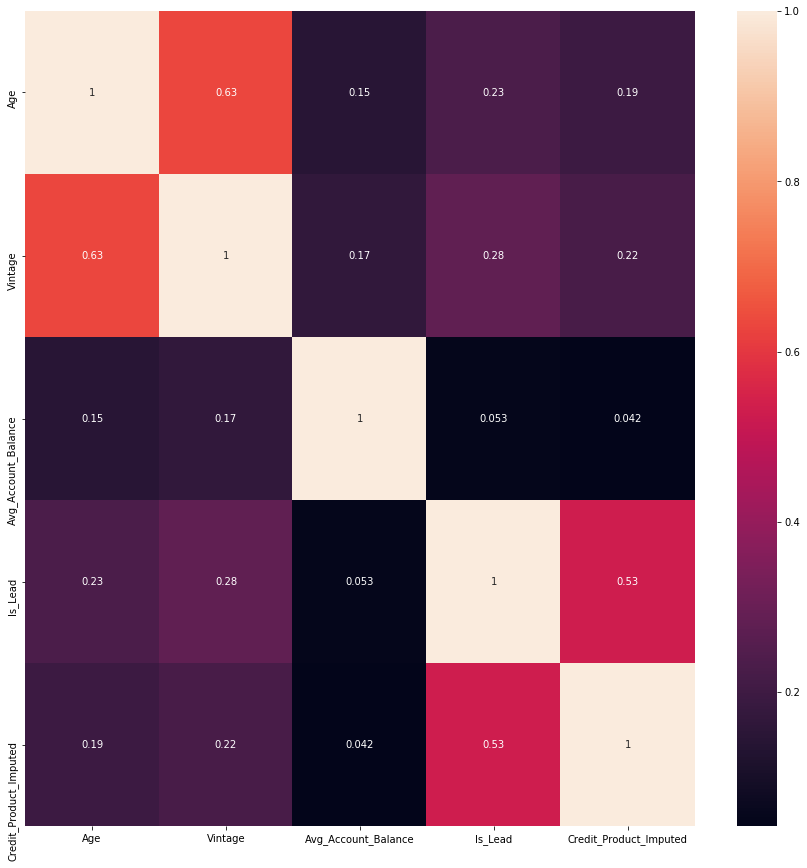

In [11]:
cols = list(range(12))  # list of all features
fig, ax = plt.subplots(figsize=(15,15)) # defining the size and shape of the plot
corelation = df.iloc[:,cols].corr() 
sns.heatmap(corelation, xticklabels = corelation.columns, yticklabels = corelation.columns, annot = True)
plt.savefig('Correlation matrix range all.png') # saving the plot

In [12]:
##We can see that there is a strong positive relationship between (Vintage,Age) and (Credit_product_imputed,is_lead)
##Hence Dropping Age seems logical thing to do (edit: tested with Age too, without age giving better results)

In [13]:
df.Is_Lead.value_counts()

0    187437
1     58288
Name: Is_Lead, dtype: int64

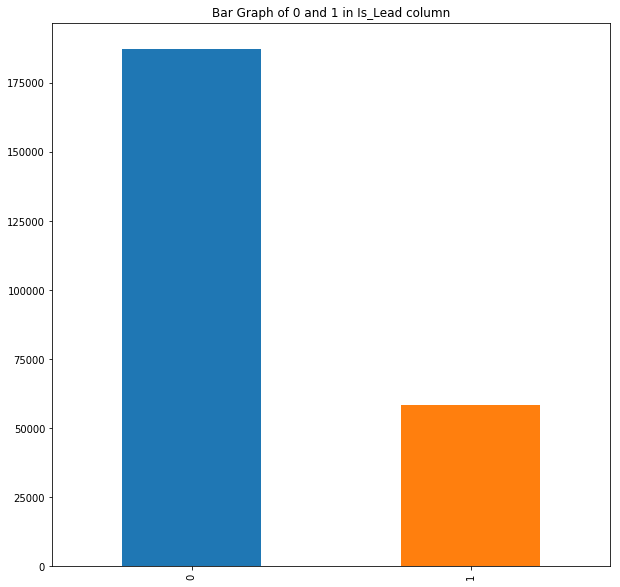

In [14]:
df.Is_Lead.value_counts().plot(kind='bar', figsize = (10,10), title = 'Bar Graph of 0 and 1 in Is_Lead column')
plt.xlabel = ('CC interested status')
plt.ylabel = ('No. of Leads')

In [15]:
#Now we clearly see that this data is imbalanced

## Splitting the Features and Target Variables

In [16]:
#Encoding Input Categorical values to Ordinal or Integer
Gender_dict = {'Female':1, 'Male':2}
df['Gender_Ordinal'] = df.Gender.map(Gender_dict)
df = df.drop(['Gender'],axis=1)

Credit_Product_dict = {'No':3,'Yes':4}
df['Credit_Product_Ordinal'] = df.Credit_Product.map(Credit_Product_dict)
df = df.drop(['Credit_Product'],axis=1)

Is_Active_dict = {'No':3,'Yes':4}
df['Is_Active_Ordinal'] = df.Is_Active.map(Is_Active_dict)
df = df.drop(['Is_Active'],axis=1)

Occupation_dict = {'Entrepreneur':5,'Salaried':6,'Self_Employed':7,'Other':8}
df['Occupation_Ordinal'] = df.Occupation.map(Occupation_dict)
df = df.drop(['Occupation'],axis=1)

df['Channel_Code'] = df['Channel_Code'].str.replace(r'X', '')
df['Channel_Code'] = df['Channel_Code'].astype(str).astype(int)
df['Region_Code'] = df['Region_Code'].str.replace(r'RG', '')
df['Region_Code'] = df['Region_Code'].astype(str).astype(int)

In [17]:
#Encoding Test Data Set Similar as Above
Gender_dict = {'Female':1, 'Male':2}
dftest['Gender_Ordinal'] = dftest.Gender.map(Gender_dict)
dftest = dftest.drop(['Gender'],axis=1)

Credit_Product_dict = {'No':3,'Yes':4}
dftest['Credit_Product_Ordinal'] = dftest.Credit_Product.map(Credit_Product_dict)
dftest = dftest.drop(['Credit_Product'],axis=1)

Is_Active_dict = {'No':3,'Yes':4}
dftest['Is_Active_Ordinal'] = dftest.Is_Active.map(Is_Active_dict)
dftest = dftest.drop(['Is_Active'],axis=1)

Occupation_dict = {'Entrepreneur':5,'Salaried':6,'Self_Employed':7,'Other':8}
dftest['Occupation_Ordinal'] = dftest.Occupation.map(Occupation_dict)
dftest = dftest.drop(['Occupation'],axis=1)

dftest['Channel_Code'] = dftest['Channel_Code'].str.replace(r'X', '')
dftest['Channel_Code'] = dftest['Channel_Code'].astype(str).astype(int)
dftest['Region_Code'] = dftest['Region_Code'].str.replace(r'RG', '')
dftest['Region_Code'] = dftest['Region_Code'].astype(str).astype(int)

In [18]:
df.dtypes #To check dtypes all being converted to Integers

ID                        object
Age                        int64
Region_Code                int32
Channel_Code               int32
Vintage                    int64
Avg_Account_Balance        int64
Is_Lead                    int64
Credit_Product_Imputed     int32
Gender_Ordinal             int64
Credit_Product_Ordinal     int64
Is_Active_Ordinal          int64
Occupation_Ordinal         int64
dtype: object

In [19]:
#Removing the Feature Age because of strong correlation effect
df = df.drop(['Age','ID'],axis=1)

X = df.iloc[:, df.columns != 'Is_Lead'].values # Selecting All columns except Is_Lead column 
y = df.iloc[:, df.columns == 'Is_Lead'].values # Selecting Only Is_Lead column

from sklearn.preprocessing import LabelEncoder

# encode string output values as integers
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y)
label_encoded_y = label_encoder.transform(y)


C:\Users\bhoos\Miniconda3\envs\mlbook\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bhoos\Miniconda3\envs\mlbook\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
X.shape

(245725, 9)

In [21]:
y.shape

(245725, 1)

## Train-Test Split

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 38)

In [23]:
X_train = np.asmatrix(X_train) #Converting to np.ndarray to fix a bug
X_train.shape # shape of X_train

(196580, 9)

In [24]:
X_test = np.asmatrix(X_test) #Converting to np.ndarray to fix a bug
X_test.shape # shape of X_test

(49145, 9)

In [25]:
#y_train = np.asmatrix(y_train)
y_train.shape # shape of y_train

(196580, 1)

In [27]:
y_test.shape

(49145, 1)

# Default Xgboost Classifier Model

In [28]:
# for tracking time
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [29]:
# Xgboost model
from xgboost import XGBClassifier
classifier = XGBClassifier()

from datetime import datetime

start_time = timer(None) # timing starts from this point for "start_time" variable
classifier.fit(X_train, y_train)
timer(start_time) # timing ends here for "start_time" variable

C:\Users\bhoos\Miniconda3\envs\mlbook\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bhoos\Miniconda3\envs\mlbook\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 Time taken: 0 hours 0 minutes and 11.1 seconds.


## X_test prediction on default hyperparameters

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[36114  1402]
 [ 5591  6038]]


C:\Users\bhoos\Miniconda3\envs\mlbook\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8577067860413063

In [31]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.87      0.96      0.91     37516
          1       0.81      0.52      0.63     11629

avg / total       0.85      0.86      0.85     49145



## X set Prediction on default hyperparameters

In [32]:
y_pred = classifier.predict(X)
cm = confusion_matrix(y, y_pred)
print(cm)
accuracy_score(y, y_pred)

C:\Users\bhoos\Miniconda3\envs\mlbook\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[[180308   7129]
 [ 27914  30374]]


0.8573893580221793

In [33]:
print(classification_report(y,y_pred))

             precision    recall  f1-score   support

          0       0.87      0.96      0.91    187437
          1       0.81      0.52      0.63     58288

avg / total       0.85      0.86      0.85    245725



## HyperParameters tuning with Gridsearch CV

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
params={
 "learning_rate"    : [0.05,0.1, 0.3,0.35] ,
 "max_depth"        : [ 12, 15]   
}

In [37]:
grid_search= GridSearchCV(estimator = classifier,param_grid=params,scoring='f1',n_jobs=-1,cv=5)

In [38]:
start_time = timer(None) # timing starts from this point for "start_time" variable
grid_search.fit(X_train,y_train.ravel())
timer(start_time) # timing ends here for "start_time" variable


 Time taken: 0 hours 8 minutes and 2.09 seconds.


In [39]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=12, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [40]:
accuracy = grid_search.best_score_
accuracy

0.6455989507056291

In [41]:
grid_tuned_classifier = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=12, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [42]:
grid_tuned_classifier.fit(X_train, y_train.ravel())
y_pred = grid_tuned_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy on X_test set ',accuracy_score(y_test, y_pred))

[[35610  1906]
 [ 5275  6354]]
Accuracy on X_test set  0.8538813714518262


C:\Users\bhoos\Miniconda3\envs\mlbook\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [43]:
print('Classification report on X_test set\n',classification_report(y_test,y_pred))

Classification report on X_test set
              precision    recall  f1-score   support

          0       0.87      0.95      0.91     37516
          1       0.77      0.55      0.64     11629

avg / total       0.85      0.85      0.84     49145



In [44]:
y_pred = grid_tuned_classifier.predict(X)
cm = confusion_matrix(y, y_pred)
print(cm)
print('Accuracy on whole X set ',accuracy_score(y, y_pred))

[[180343   7094]
 [ 23117  35171]]
Accuracy on whole X set  0.8770536168481026


C:\Users\bhoos\Miniconda3\envs\mlbook\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [45]:
print('Classification report on whole X set\n',classification_report(y,y_pred))

Classification report on whole X set
              precision    recall  f1-score   support

          0       0.89      0.96      0.92    187437
          1       0.83      0.60      0.70     58288

avg / total       0.87      0.88      0.87    245725



## Hyperparameter Tuning with RandomizedSearchCV

In [46]:
from sklearn.model_selection import RandomizedSearchCV

In [93]:
params={
 "learning_rate"    : [0.05, 0.1, 0.2, 0.3, 1 ] ,
 "max_depth"        : [10, 12, 15],
 "min_child_weight" : [ 1, 3 ],
 "gamma"            : [ 0.0, 0.15, 0.3]
    
}

In [94]:
random_search= RandomizedSearchCV(estimator = classifier,param_distributions=params,n_iter=10,scoring='f1',n_jobs=-1,cv=5)

In [95]:
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train,y_train.ravel())
#random_search.fit(X,y.ravel())
timer(start_time) # timing ends here for "start_time" variable


 Time taken: 0 hours 7 minutes and 0.19 seconds.


In [96]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.3, learning_rate=0.3, max_delta_step=0,
       max_depth=10, min_child_weight=3, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [97]:
random_search.best_params_

{'min_child_weight': 3, 'max_depth': 10, 'learning_rate': 0.3, 'gamma': 0.3}

In [98]:
#random_tuned_classifier = XGBClassifier (base_score=0.5, booster='gbtree', colsample_bylevel=1,
#       colsample_bytree=1, gamma=0.15, learning_rate=0.1, max_delta_step=0,
#       max_depth=12, min_child_weight=3, missing=None, n_estimators=100,
#       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
#       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
#       silent=True, subsample=1)

#Tuned 2nd  time  
#random_tuned_classifier = XGBClassifier (base_score=0.5, booster='gbtree', colsample_bylevel=1,
#       colsample_bytree=1, gamma=0.3, learning_rate=0.05, max_delta_step=0,
#       max_depth=12, min_child_weight=3, missing=None, n_estimators=100,
#       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
#       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
#       silent=True, subsample=1)    

#Tuned 3rd  time  
random_tuned_classifier = XGBClassifier (base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.3, learning_rate=0.3, max_delta_step=0,
       max_depth=10, min_child_weight=3, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)    

In [99]:
random_tuned_classifier.fit(X_train, y_train.ravel())
y_pred = random_tuned_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy on X_test set ',accuracy_score(y_test, y_pred))

[[35572  1944]
 [ 5225  6404]]
Accuracy on X_test set  0.8541255468511547


C:\Users\bhoos\Miniconda3\envs\mlbook\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [54]:
print('Classification report of X_test set',classification_report(y_test,y_pred))

Classification report of X_test set              precision    recall  f1-score   support

          0       0.87      0.95      0.91     37516
          1       0.77      0.55      0.64     11629

avg / total       0.85      0.85      0.85     49145



In [55]:
#Whole X Set prediction

In [103]:
y_pred = random_tuned_classifier.predict(X)
cm = confusion_matrix(y, y_pred)
print(cm)
print('Accuracy on whole X set',accuracy_score(y, y_pred))

[[180017   7420]
 [ 23332  34956]]
Accuracy on whole X set 0.874851968664157


C:\Users\bhoos\Miniconda3\envs\mlbook\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [104]:
print('Classification report on whole X set',classification_report(y,y_pred))

Classification report on whole X set              precision    recall  f1-score   support

          0       0.89      0.96      0.92    187437
          1       0.82      0.60      0.69     58288

avg / total       0.87      0.87      0.87    245725



In [58]:
#Saving the Model
import pickle
rtc = random_tuned_classifier
pickle.dump(rtc,open('rtcmodel1','wb'))

grid = grid_search
pickle.dump(grid,open('gridmodel','wb'))

## Using Test Data to Check Results on Randomized Tuning & Grid Search CV

In [113]:
#Removing Age and ID features from the Dataset
dftest1 = dftest.drop(['Age','ID'],axis=1)
dftest1 = np.asmatrix(dftest1)

#Grid Tuned Classifier on test dataset provided
grid_search.fit(X_train, y_train.ravel())
y_pred = grid_tuned_classifier.predict_proba(dftest1)

In [114]:
y_pred

array([[0.9595284 , 0.04047162],
       [0.1302675 , 0.8697325 ],
       [0.9400739 , 0.05992607],
       ...,
       [0.9548719 , 0.04512811],
       [0.83199286, 0.16800714],
       [0.9466562 , 0.05334375]], dtype=float32)

In [106]:
#Random Tuned Classifier on test dataset provided
random_tuned_classifier.fit(X_train, y_train.ravel())
y_pred = random_tuned_classifier.predict_proba(dftest1)

In [107]:
y_pred

array([[0.9629797 , 0.03702033],
       [0.15091795, 0.84908205],
       [0.9346736 , 0.06532638],
       ...,
       [0.968864  , 0.03113598],
       [0.8096102 , 0.1903898 ],
       [0.96810067, 0.03189935]], dtype=float32)

In [108]:

y_pred1 = pd.DataFrame({'ynot_pred': y_pred[:, 0], 'Is_Lead': y_pred[:, 1]})
y_out = dftest
result = pd.concat([y_out, y_pred1], axis=1)
col_name = ['ID','Is_Lead']
resultfinal = result[col_name]

In [109]:
resultfinal.head()

,ID,Is_Lead
0,VBENBARO,0.037020
1,CCMEWNKY,0.849082
2,VK3KGA9M,0.065326
3,TT8RPZVC,0.018539
4,SHQZEYTZ,0.024186


In [110]:
#To Save the Output file in the Required Format
resultfinal.to_csv('XGBHyper_pred2.csv',header=True, index=False)

## Conclusion

### RandomizedSearchCV always gives different results. I ran this 4 times and 0.86 was the best score I got on the test set.
### Randomized Search CV approach of Hyperparameter tuning gave better results but in more time (with 13 parameters distribution). Grid Search CV takes more time and computation power when grid is bigger, so I used only 5 numbers of parameters in parameter grid. Although Randomized Search CV took more time but it covers more parameters.